In [56]:
import seaborn
import matplotlib.pyplot as plt
from surnames_package import utils

In [31]:
import pandas

# Indicador: v de Karlin Mcgregor

In [115]:
df_2001 = (
    pandas.read_parquet(
        "../_products/departmental/karlin-mcgregor-2001.parquet")
    .rename(columns={'v': '2001'})
)

df_2015 = (
    pandas.read_parquet(
        "../_products/departmental/karlin-mcgregor-2015.parquet")
    .rename(columns={'v': '2015'})
)

df_2021 = (
    pandas.read_parquet(
        "../_products/departmental/karlin-mcgregor-2021.parquet")
    .rename(columns={'v': '2021'})
)

df = pandas.merge(
    pandas.merge(df_2001, df_2015, on='department_id'),
    df_2021,
    on='department_id'
)

In [116]:
trend_df = df[['department_id', '2001', '2015', '2021']].copy()
trend_df['variable'] = 'v'

unstacked_trend_df = (
    trend_df.set_index(['department_id', 'variable'])
       .rename_axis(['year'], axis=1)
       .stack()
       .unstack('variable')
       .reset_index()
)

unstacked_trend_df.index.name = None

unstacked_trend_df.columns.name = None

# print(unstacked_trend_df.head(3))

df_plot = utils.append_cell_description(
    unstacked_trend_df,
    departmentCodeColumn='department_id'
)

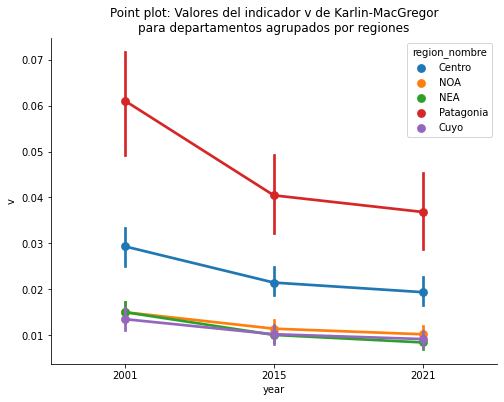

In [117]:
f, ax = plt.subplots(figsize=(8, 6))

seaborn.pointplot(
    data=df_plot,
    x="year",
    y="v",
    hue='region_nombre',
    ax=ax
)

# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)
plt.title("Point plot: Valores del indicador v de Karlin-MacGregor\npara departamentos agrupados por regiones")
plt.show();

<Figure size 864x576 with 0 Axes>

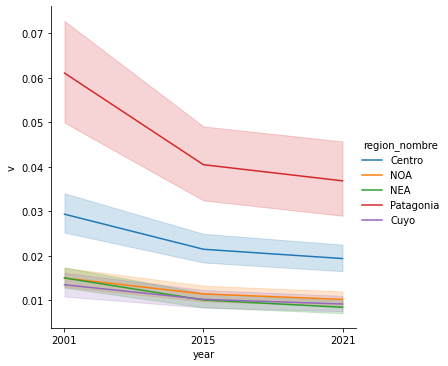

In [118]:
f = plt.figure(figsize=(12, 8))

seaborn.relplot(
    data=df_plot,
    x="year",
    y="v",
    kind="line",
    hue='region_nombre',
    dashes=False,
    markers=True,
)


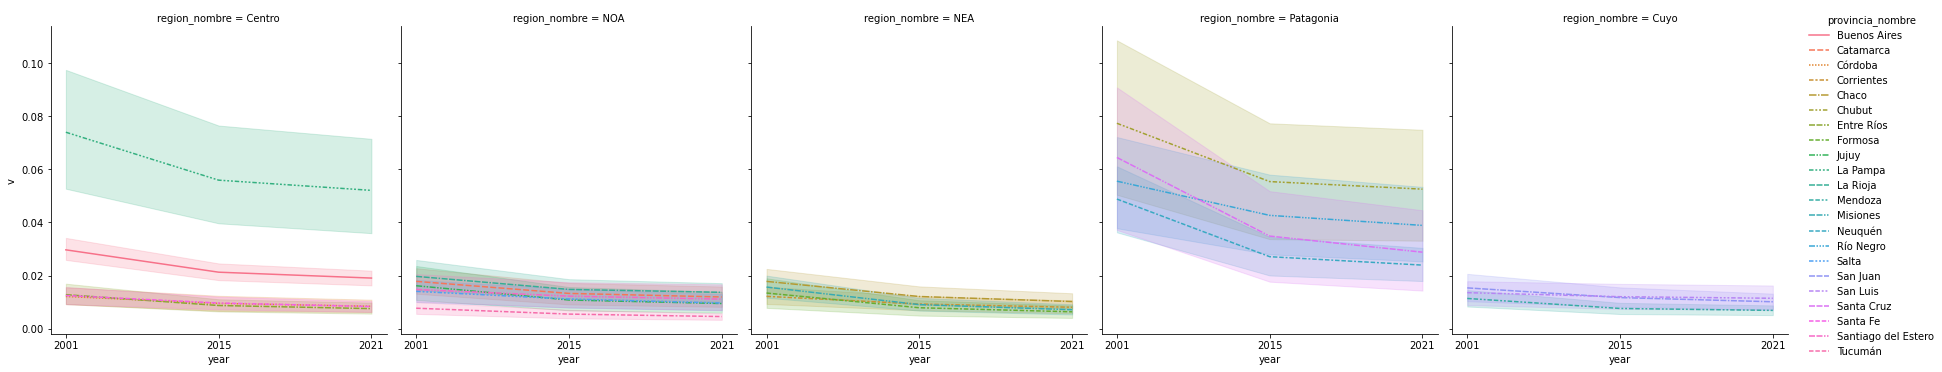

In [119]:
seaborn.relplot(
    data=df_plot, x="year", y="v",
    col="region_nombre", hue="provincia_nombre", style="provincia_nombre",
    kind="line"
)


# Indicador: m de Wrigth

In [120]:
df_2001 = (
    pandas.read_parquet(
        "../_products/departmental/wright-2001.parquet")
    .rename(columns={'m': '2001'})
)

df_2015 = (
    pandas.read_parquet(
        "../_products/departmental/wright-2015.parquet")
    .rename(columns={'m': '2015'})
)

# there are a duplicated department
df_2015 = df_2015[~df_2015['department_id'].duplicated()]

df_2021 = (
    pandas.read_parquet(
        "../_products/departmental/wright-2021.parquet")
    .rename(columns={'m': '2021'})
)

df_2021 = df_2021[~df_2021['department_id'].duplicated()]

df = pandas.merge(
    pandas.merge(df_2001, df_2015, on='department_id'),
    df_2021,
    on='department_id'
)

In [121]:
trend_df = df[['department_id', '2001', '2015', '2021']].copy()
trend_df['variable'] = 'm'

In [122]:
unstacked_trend_df = (
    trend_df.set_index(['department_id', 'variable'])
       .rename_axis(['year'], axis=1)
       .stack()
       .unstack('variable')
       .reset_index()
)

unstacked_trend_df.index.name = None

unstacked_trend_df.columns.name = None

# print(unstacked_trend_df.head(3))

df_plot = utils.append_cell_description(
    unstacked_trend_df,
    departmentCodeColumn='department_id'
)

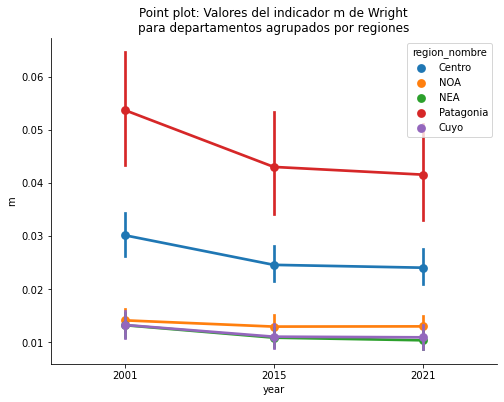

In [125]:
f, ax = plt.subplots(figsize=(8, 6))

seaborn.pointplot(
    data=df_plot,
    x="year",
    y="m",
    hue='region_nombre',
    ax=ax
)

# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)

plt.title("Point plot: Valores del indicador m de Wright\npara departamentos agrupados por regiones")

plt.show();

<Figure size 864x576 with 0 Axes>

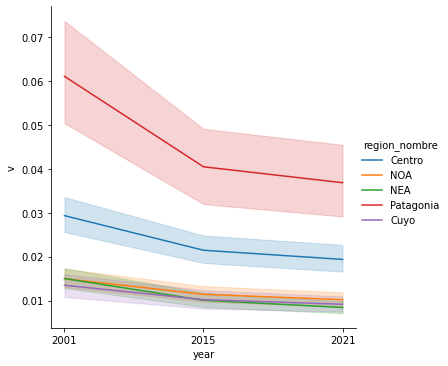

In [74]:
f = plt.figure(figsize=(12, 8))

seaborn.relplot(
    data=df_plot,
    x="year",
    y="v",
    kind="line",
    hue='region_nombre',
    dashes=False,
    markers=True,
)


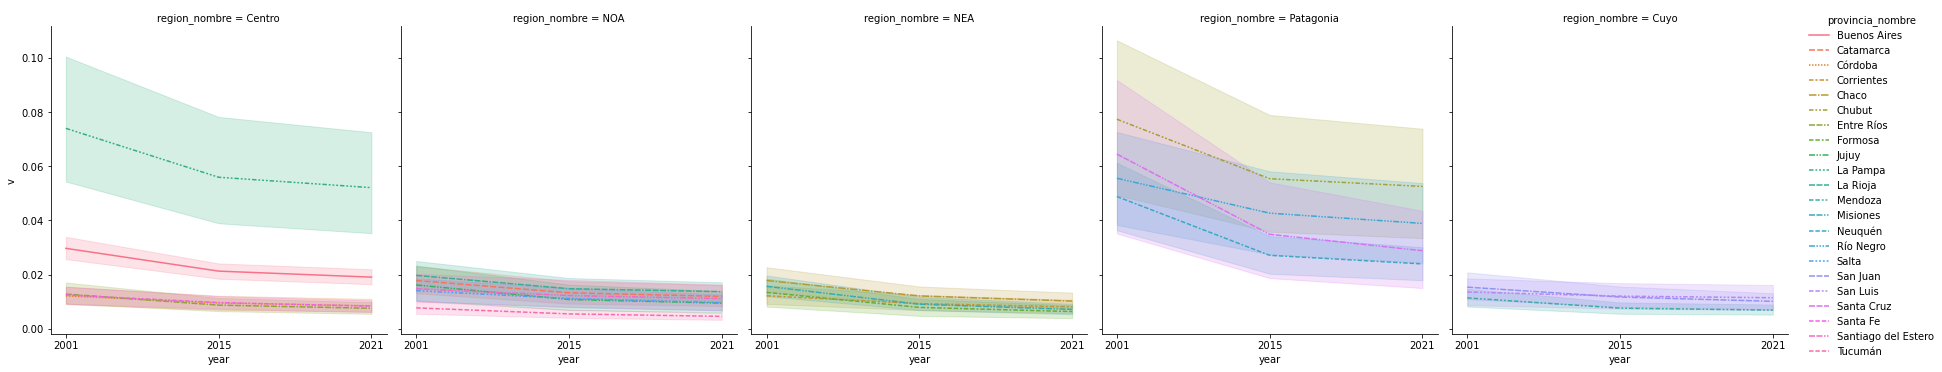

In [76]:
seaborn.relplot(
    data=df_plot, x="year", y="v",
    col="region_nombre", hue="provincia_nombre", style="provincia_nombre",
    kind="line"
)
